In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pwd


/content


In [6]:
%cd /content/drive/MyDrive/Emotion

/content/drive/MyDrive/Emotion


In [8]:
!pip install kaggle

In [9]:
!pip install shutil

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [11]:
import shutil
import kagglehub  # Import the kagglehub module
import os
# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

target_dir = "./data"
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Di chuyển dataset từ thư mục mặc định tới ./data
shutil.move(path, target_dir)

print("Path to dataset files:", target_dir)

100%|██████████| 60.3M/60.3M [00:03<00:00, 17.2MB/s]

Extracting files...


Path to dataset files: ./data


In [12]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'keras_preprocessing'

In [13]:
!pip install tensorflow keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00


In [14]:
!pwd

/content/drive/MyDrive/Emotion


In [15]:
TRAIN_DIR = '/content/drive/MyDrive/Emotion/data/1/train'
TEST_DIR = '/content/drive/MyDrive/Emotion/data/1/test'

In [16]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [17]:
import pandas as pd
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

fear completed
disgust completed
happy completed
surprise completed
sad completed
neutral completed
angry completed


In [18]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

fear completed
disgust completed
happy completed
surprise completed
sad completed
neutral completed
angry completed


In [19]:
from tensorflow.keras.utils import load_img

In [20]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def extract_features(images):
    features = []
    for image in images:
        try:
            # Load ảnh ở chế độ grayscale
            img = load_img(image, color_mode='grayscale')
            img = np.array(img)
            features.append(img)
        except Exception as e:
            print(f"Lỗi khi đọc ảnh: {image}, lỗi: {e}")
    features = np.array(features)
    # Định hình lại tensor cho phù hợp
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [21]:
train_image_paths, train_labels = createdataframe(TRAIN_DIR)
test_image_paths, test_labels = createdataframe(TEST_DIR)

train_features = extract_features(train_image_paths)
test_features = extract_features(test_image_paths)


fear completed
disgust completed
happy completed
surprise completed
sad completed
neutral completed
angry completed
fear completed
disgust completed
happy completed
surprise completed
sad completed
neutral completed
angry completed


In [22]:
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn thành số
le = LabelEncoder()
y_train = le.fit_transform(train['label'])
y_test = le.transform(test['label'])

# Chuyển nhãn thành dạng one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print(y_train.shape)  # Kiểm tra kích thước, ví dụ: (28709, 7)
print(y_test.shape)   # Kiểm tra kích thước, ví dụ: (7178, 7)


(28709, 7)
(7178, 7)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.2393 - loss: 1.8354 - val_accuracy: 0.2471 - val_loss: 1.8165
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2511 - loss: 1.8157 - val_accuracy: 0.2444 - val_loss: 1.7951
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2577 - loss: 1.7909 - val_accuracy: 0.2944 - val_loss: 1.6978
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3090 - loss: 1.7037 - val_accuracy: 0.4065 - val_loss: 1.5410
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.3758 - loss: 1.5883 - val_accuracy: 0.4322 - val_loss: 1.4603
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.4162 - loss: 1.4995 - val_accuracy: 0.4723 - val_loss: 1.3629
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.4444 - loss: 1.4423 - val_accuracy: 0.4851 - val_loss: 1.3262
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.4605 - loss: 1

In [26]:
model_json = model.to_json()
with open("emotion_model.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotion_model.h5")

In [27]:
from tensorflow.keras.models import model_from_json
json_file = open("emotion_model.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotion_model.h5")

In [28]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
import numpy as np
def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [30]:
import os

image = os.path.join(TRAIN_DIR, 'sad/Training_10022789.jpg')
print("original image is of sad")

# Check if the file exists
if os.path.exists(image):
    img = ef(image)
    pred = model.predict(img)
    pred_label = label[pred.argmax()]
    confidence = pred.max()
    print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
else:
    print(f"Error: File not found at {image}")

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
Model prediction: sad with confidence 81.98%


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model prediction: sad with confidence 81.98%


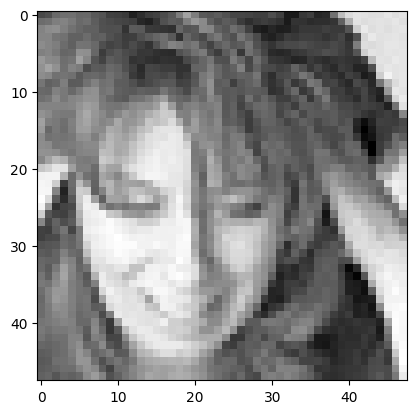

In [32]:
import os

image = os.path.join(TRAIN_DIR, 'sad/Training_10022789.jpg')
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model prediction: fear with confidence 89.47%


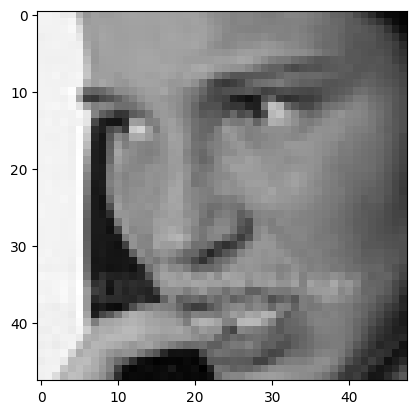

In [33]:
image = os.path.join(TRAIN_DIR, 'fear/Training_10018621.jpg')
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model prediction: angry with confidence 92.27%


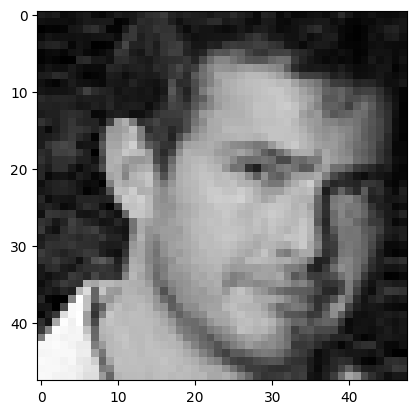

In [ ]:
image = os.path.join(TRAIN_DIR, 'angry/Training_10120469.jpg')
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model prediction: happy with confidence 96.24%


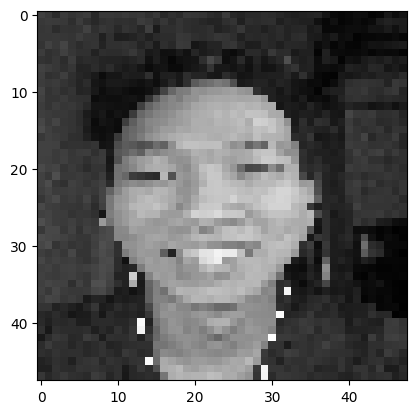

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Correct the function ef to use load_img from keras
def ef(image_path):
    # Load the image with the target size
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))

    # Convert the image to a NumPy array
    img_array = img_to_array(img)

    # Normalize the image (optional, depending on your model's input requirements)
    img_array = img_array / 255.0

    # Add batch dimension
    img_array = img_array.reshape((1, 48, 48, 1))

    return img_array

# Usage
image = '/content/drive/MyDrive/Emotion/data/Image_Emotion.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48, 48), cmap='gray')


original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction: happy with confidence 97.65%


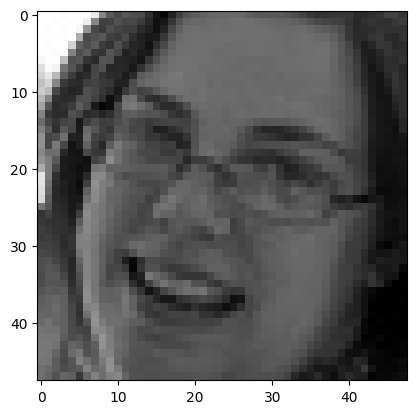

In [ ]:
image = os.path.join(TRAIN_DIR, 'happy/Training_10019449.jpg')
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model prediction: neutral with confidence 80.63%


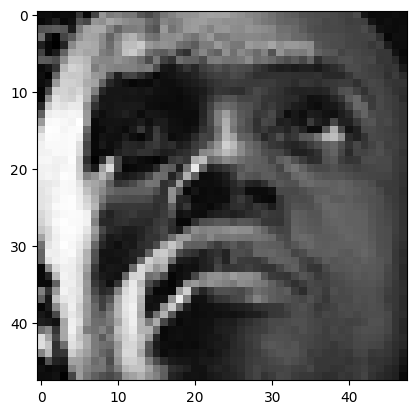

In [ ]:
image = os.path.join(TRAIN_DIR, 'neutral/Training_10002154.jpg')
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction: surprise with confidence 76.16%


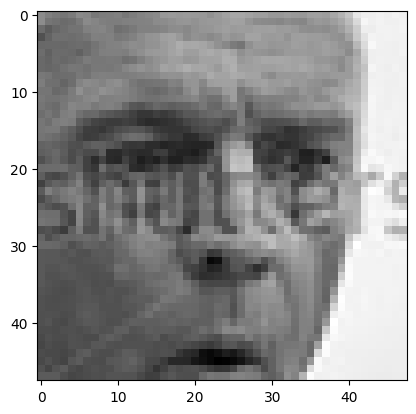

In [ ]:
image = os.path.join(TRAIN_DIR, 'surprise/Training_10013223.jpg')
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')